# Introduction to Julia
**[Bogumił Kamiński](http://bogumilkaminski.pl/about/), May 23, 2018**

Let's get started by loading the `DataFrames` package.

In [79]:
using Pkg

In [2]:
using Gadfly

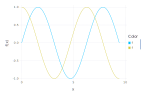

In [3]:
p1 = plot([sin,cos], 0, 3pi)

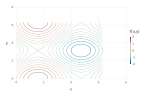

In [6]:
p2 = plot((x,y)->sin(x)+cos(y), 0, 2pi, 0, 2pi)

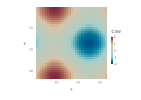

In [9]:
p3 = spy(ones(33)*sin.(0:(pi/16):2pi)' + cos.(0:(pi/16):2pi)*ones(33)')

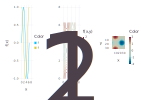

In [10]:
hstack(p1,p2,p3)

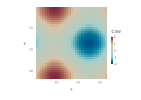

In [15]:
p4 = spy(ones(33)*sin.(0:(pi/16):2pi)' + cos.(0:(pi/16):2pi)*ones(33)')

In [54]:
using CSV

In [22]:
df = CSV.read("names.csv"; header=true, skipto=2, limit=1)

,first,last
,String,String
1,Hasan,Yousef


In [58]:
for row in CSV.File("names.csv")
    println("first = $(row.first), last = $(row.last)")
end

first = Yacoub, last = Yousef
first = Dana, last = Hasan
first = Hasan, last = Yousef
first = Yacoub 2, last = Yousef
first = Dana 2, last = Hasan


In [18]:
CSV.File("names.csv")
CSV.File("names.csv"; header=false, skipto=1, limit=1)

CSV.File("names.csv"):
Size: 1 x 2
Tables.Schema:
 :Column1  String
 :Column2  String

In [46]:
CSV.write("names.csv", vcat(df_new, df))

"names.csv"

In [56]:
df_new = DataFrame(first =  ["Yacoub 2", "Dana 2"], last =  ["Yousef", "Hasan"])

,first,last
,String,String
1,Yacoub 2,Yousef
2,Dana 2,Hasan


In [55]:
using DataFrames

In [57]:
CSV.write("names.csv", df_new, append=true)

"names.csv"

In [35]:
using Pkg
Pkg.add("DataFrames")

 Resolving package versions...
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [44]:
join(df1, df2, kind = :outer, on = intersect(names(df1), names(df2)))

UndefVarError: UndefVarError: df1 not defined

In [47]:
Pkg.add("JuliaDB")

 Resolving package versions...
 Installed WeakRefStrings ───── v0.5.8
 Installed TableTraitsUtils ─── v1.0.0
 Installed Dagger ───────────── v0.8.0
 Installed OnlineStats ──────── v0.23.0
 Installed TranscodingStreams ─ v0.9.5
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [49]:
using JuliaDB

In [59]:
using Pkg

In [52]:
Pkg.add("Plots")

 Resolving package versions...
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [60]:
Pkg.add("LibPQ")

 Resolving package versions...
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\hasan.DESKTOP-HU2FQ29\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [2]:
using LibPQ

In [1]:
using LibPQ, Tables, JuliaDB

In [2]:
conn = LibPQ.Connection("dbname=postgres user=postgres")

Enter password for PostgreSQL user postgres::  ·········


PostgreSQL connection (CONNECTION_OK) with parameters:
  user = postgres
  password = ********************
  dbname = postgres
  port = 5432
  client_encoding = UTF8
  application_name = LibPQ.jl
  sslmode = prefer
  sslcompression = 1
  krbsrvname = postgres
  target_session_attrs = any

In [3]:
result = execute(conn, "SELECT * FROM devices")

PostgreSQL result

In [4]:
data = columntable(result)

(id = Union{Missing, String}["a0eebc99-9c0b-4ef8-bb6d-6bb9bd380a11", "3f27be5e-9f79-4cdf-bfd8-28b8b6ca7605"], data = Union{Missing, String}["{\"new\": true, \"name\": \"Hasan\", \"genres\": [\"Fiction\", \"Thriller\", \"Horror\"]}", "{\"new\": true, \"name\": \"Hasan Yousef\", \"genres\": [\"Fiction\", \"Thriller\", \"Horror\"]}"])

In [5]:
data |> table

Table with 2 rows, 2 columns:
Columns:
#  colname  type
──────────────────────────────────
1  id       Union{Missing, String}
2  data     Union{Missing, String}

In [6]:
data[1]

2-element LibPQ.Column{Union{Missing, String}}:
 "a0eebc99-9c0b-4ef8-bb6d-6bb9bd380a11"
 "3f27be5e-9f79-4cdf-bfd8-28b8b6ca7605"

In [20]:
data[2]

2-element LibPQ.Column{Union{Missing, String}}:
 "{\"new\": true, \"name\": \"Hasan\", \"genres\": [\"Fiction\", \"Thriller\", \"Horror\"]}"       
 "{\"new\": true, \"name\": \"Hasan Yousef\", \"genres\": [\"Fiction\", \"Thriller\", \"Horror\"]}"

In [33]:
using LazyJSON

In [34]:
LazyJSON.value(data[2])

MethodError: MethodError: no method matching String(::LibPQ.Column{Union{Missing, String}})
Closest candidates are:
  String(!Matched::String) at boot.jl:320
  String(!Matched::Array{UInt8,1}) at strings/string.jl:39
  String(!Matched::Base.CodeUnits{UInt8,String}) at strings/string.jl:77
  ...

In [25]:
using JSON

In [38]:
JSON.parse(df.data[1])

Dict{String,Any} with 3 entries:
  "name"   => "Hasan"
  "new"    => true
  "genres" => Any["Fiction", "Thriller", "Horror"]

In [16]:
using JSON3, DataFrames

In [35]:
df = data |> DataFrame

,id,data
,String⍰,String⍰
1,a0eebc99-9c0b-4ef8-bb6d-6bb9bd380a11,"{""new"": true, ""name"": ""Hasan"", ""genres"": [""Fiction"", ""Thriller"", ""Horror""]}"
2,3f27be5e-9f79-4cdf-bfd8-28b8b6ca7605,"{""new"": true, ""name"": ""Hasan Yousef"", ""genres"": [""Fiction"", ""Thriller"", ""Horror""]}"


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames C:\Users\hasan.DESKTOP-HU2FQ29\.julia\packages\DataFrames\XuYBH\src\abstractdataframe\show.jl:39


In [18]:
x = JSON3.read(df.data[1])

JSON3.Object{Base.CodeUnits{UInt8,String},Array{UInt64,1}} with 3 entries:
  :new    => true
  :name   => "Hasan"
  :genres => ["Fiction", "Thriller", "Horror"]

In [10]:
IndexedTables.set_show_compact!(false)

UndefVarError: UndefVarError: IndexedTables not defined

In [78]:
close(conn)

In [3]:
fname = "simplefile.txt"

"simplefile.txt"

In [5]:
open(fname,"r") do f
    for line in eachline(f)
        print(line)
    end
end

hi there

In [10]:
f = open(fname,"r")

IOStream(<file simplefile.txt>)

In [14]:
pwd() #Current Directory

"C:\\Users\\hasan.DESKTOP-HU2FQ29\\pycharmprojects"

In [16]:
open(fname) do f
    for (i, line) in enumerate(eachline(f))
        println("Line $i: $line")
    end
end

Line 1: What's in a name? That which we call a rose
Line 2: By any other name would smell as sweet.


In [17]:
open(readstring, fname)

UndefVarError: UndefVarError: readstring not defined

In [23]:
s

"What's in a name? That which we call a rose\r\nBy any other name would smell as sweet."

In [28]:
 match(r"(rose|sweet)s?", s)

RegexMatch("rose", 1="rose")

In [51]:
match(r"(sweet)s?", s)

RegexMatch("sweet", 1="sweet")

In [53]:
match(r"/(?=.*?(rose))(?=.*?(sweet))/is", s)

In [54]:
x= ["rose", "sweet"]

2-element Array{String,1}:
 "rose" 
 "sweet"

In [57]:
strip(s, ['i', 'a', '\n', '\r', ' '])

"What's in a name? That which we call a rose\r\nBy any other name would smell as sweet."

In [56]:
strip("{3, 5}\n", ['{', '}', '\n'])

"3, 5"

In [58]:
eachmatch(r"(rose|sweet)s?", s)

Base.RegexMatchIterator(r"(rose|sweet)s?", "What's in a name? That which we call a rose\r\nBy any other name would smell as sweet.", false)

In [137]:
required_skills = ["rose", "sweet"]

2-element Array{String,1}:
 "rose" 
 "sweet"

In [157]:
rx = "skill"
for skill in required_skills
    rx = "$rx|$skill"
end
rx = Regex(string("($rx)s?"))

r"(skill|rose|sweet)s?"

In [65]:
rx = r"(rose|sweet)s?"

r"(rose|sweet)s?"

In [68]:
collect(eachmatch(rx, s, overlap = true))

3-element Array{RegexMatch,1}:
 RegexMatch("rose", 1="rose")  
 RegexMatch("sweet", 1="sweet")
 RegexMatch("rose", 1="rose")  

In [109]:
s = read(fname, String)

"What's in a name? That which we call a rose\r\nBy any other name would smell as sweet. rose?"

In [110]:
remove_rx = r"(in|\sa\s|\swe\s|any|as|!|,|\.|\?)"  #\s one space, \s? zero or one space, \s* zero or many spaces

r"(in|\sa\s|\swe\s|any|as|!|,|\.|\?)"

In [111]:
new = replace(s, remove_rx => s"")

"What's name That whichcallrose\r\nBy  other name would smell  sweet rose"

In [159]:
found = collect(eachmatch(rx, new, overlap = true))

3-element Array{RegexMatch,1}:
 RegexMatch("rose", 1="rose")  
 RegexMatch("sweet", 1="sweet")
 RegexMatch("rose", 1="rose")  

In [163]:
found[1].captures

1-element Array{Union{Nothing, SubString{String}},1}:
 "rose"

In [164]:
found[1].match

"rose"

In [172]:
for entry in found
    println(entry.match)
end

rose
sweet
rose


In [224]:
found_skills = [] # Array{Any, length(found)}  #emp_skills

0-element Array{Any,1}

In [225]:
for (i, entry) in enumerate(found)
    println("i= $i, skill = $(entry.match)")
    push!(found_skills, entry.match)   # word by word, each char as different element
  #  append!(found_skills, entry.match)  # char by char, each char as different element
end
found_skills

i= 1, skill = rose
i= 2, skill = sweet
i= 3, skill = rose


3-element Array{Any,1}:
 "rose" 
 "sweet"
 "rose" 

In [226]:
sort!(emp_skills)

3-element Array{Any,1}:
 "rose" 
 "rose" 
 "sweet"

In [236]:
for (i, entry) in enumerate(emp_skills)
    if(i>1 && entry == emp_skills[i-1]) 
        deleteat!(emp_skills, i) 
    end
end
emp_skills

2-element Array{Any,1}:
 "rose" 
 "sweet"

In [230]:
foreach(i -> emp_skills[i] == emp_skills[i-1], deleteat!(emp_skills, i), emp_skills)
emp_skills

UndefVarError: UndefVarError: i not defined

In [232]:
#foreach(i -> emp_skills[i] == emp_skills[i-1], eachindex(emp_skills))

BoundsError: BoundsError: attempt to access 3-element Array{Any,1} at index [0]

In [209]:
#push!(emp_skills, found[1].match)

1-element Array{Any,1}:
 "rose"

In [223]:
deleteat!(emp_skills, 2)
emp_skills

2-element Array{Any,1}:
 "rose" 
 "sweet"

In [212]:
for i in 1:length(found)
    push!(emp_skills, found[i].match)
end

In [119]:
using PDFIO

In [117]:
src = "HasanResume.pdf"

"HasanResume.pdf"

In [120]:
doc = pdDocOpen(src)


PDDoc ==>

CosDoc ==>
	filepath:		C:\Users\hasan.DESKTOP-HU2FQ29\pycharmprojects\HasanResume.pdf
	size:			1065495
	hasNativeXRefStm:	 false
	Trailer dictionaries: 
	<<
	/Root	1 0 R
	/Size	93
	/Info	92 0 R
>>

Catalog:
1 0 obj
<<
	/Type	/Catalog
	/Pages	2 0 R
>>
endobj

isTagged: none


In [121]:
docinfo = pdDocGetInfo(doc)

Dict{String,Union{CDDate, String, CosObject}} with 5 entries:
  "Producer"     => "Microsoft: Print To PDF"
  "Author"       => "hasan_yousef"
  "ModDate"      => D:20190817172924+03'00
  "CreationDate" => D:20190817172924+03'00
  "Title"        => "Microsoft Word - HasanResume.docx"

In [122]:
npage = pdDocGetPageCount(doc)

2

In [126]:
for i=1:npage
    page = pdDocGetPage(doc, i)
    pdPageExtractText(io, page)
end

UndefVarError: UndefVarError: io not defined

In [127]:
function getPDFText(src, out)
    doc = pdDocOpen(src)
    docinfo = pdDocGetInfo(doc)
    open(out, "w") do io
		npage = pdDocGetPageCount(doc)
            for i=1:npage
                page = pdDocGetPage(doc, i)
                pdPageExtractText(io, page)
            end
    end
    pdDocClose(doc)
    return docinfo
end

getPDFText (generic function with 1 method)

In [128]:
getPDFText(src, string(src, ".txt"))

Dict{String,Union{CDDate, String, CosObject}} with 5 entries:
  "Producer"     => "Microsoft: Print To PDF"
  "Author"       => "hasan_yousef"
  "ModDate"      => D:20190817172924+03'00
  "CreationDate" => D:20190817172924+03'00
  "Title"        => "Microsoft Word - HasanResume.docx"

In [134]:
string(src, ".txt")

"HasanResume.pdf.txt"

In [135]:
"$src.txt"

"HasanResume.pdf.txt"